# 応答による設計

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RIPES-ACROSS/Control-System-Design-and-Application/blob/master/5_Design_by_Response/design_by_response.ipynb)

## 制御モジュールのインストール

- https://python-control.readthedocs.io/en/0.9.0/index.html

In [1]:
!pip install control

## モジュールの読込

In [2]:
from pylab import *
import control.matlab as matlab
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 残差を用いた極-零 約分の評価

\begin{align}
C_1(s) = \frac{26.25(s+4)}{(s+3.5)(s+5)(s+6)}\\
C_2(s) = \frac{26.25(s+4)}{(s+4.01)(s+5)(s+6)}
\end{align}

In [3]:
s = matlab.TransferFunction.s
sys_list = []
sys_list.append(26.25*(s+4)/((s+3.5)*(s+5)*(s+6)))
sys_list.append(26.25*(s+4)/((s+4.01)*(s+5)*(s+6)))

### 極・零

TransferFunction(array([ 26.25, 105.  ]), array([  1. ,  14.5,  68.5, 105. ]))

array([-6. , -5. , -3.5])

array([-4.])

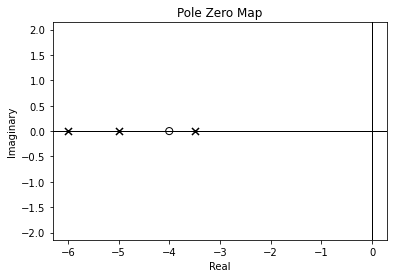

TransferFunction(array([ 26.25, 105.  ]), array([  1.  ,  15.01,  74.11, 120.3 ]))

array([-6.  , -5.  , -4.01])

array([-4.])

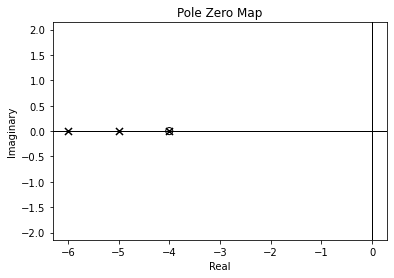

In [4]:
for sys in sys_list:
    display(sys)
    display(matlab.pole(sys), matlab.zero(sys))
    matlab.pzmap(sys)
    plt.show()

極・零 約分後の伝達関数
\begin{align}
C_3(s) = \frac{26.25}{(s+5)(s+6)}
\end{align}

In [5]:
sys_list.append(26.25/((s+5)*(s+6)))

### 応答

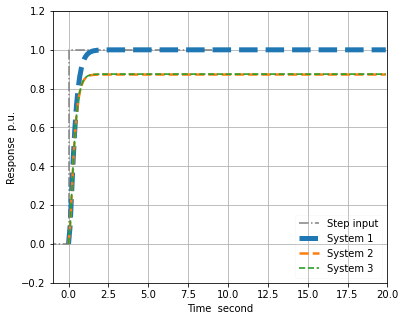

In [6]:
TIME_MAX = 20

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(list(np.arange(-10, 0+1))+list(np.arange(1, 10+1)), 
         [0]*len(np.arange(-10, 0+1))+[1]*len(np.arange(1, 10+1)), 
         '-.', color='gray', drawstyle='steps-pre', label='Step input')
for i, sys in enumerate(sys_list):
    output, time_list = matlab.step(sys, arange(0, TIME_MAX, 0.1))
    
    plt.plot(time_list, output, '--',
             label=f'System {i+1}', linewidth=5.0/(i+1))
    
plt.xlim(-1, TIME_MAX)
plt.ylim(-0.2, 1.2)
plt.xlabel('Time  second')
plt.ylabel('Response  p.u.')
plt.grid()
plt.legend(framealpha=0.1)
plt.savefig('./approx_zero_polo_cancellation.png', dpi=300, bbox_inches='tight')
plt.show()

## ピーク時間,オーバーシュート, 整定時間

\begin{align}
G(s) = \frac{361}{s^2+16s+361}
\end{align}

In [7]:
G = 26.25*(s+4)/((s+3.5)*(s+5)*(s+6))

In [8]:
zeta = 0.421
omega_n = 19

### 減衰係数$\zeta$-行き過ぎ量$\%OS$の関係

\begin{align}
\%OS = exp(\frac{-\zeta\pi}{\sqrt{1-\zeta^2}}) \times 100
\end{align}

In [9]:
zeta_list = np.arange(0, 1, 0.01)
pOS_list = list(map(lambda z: math.exp(-z*math.pi/(math.sqrt(1-z*z)))*100, zeta_list))

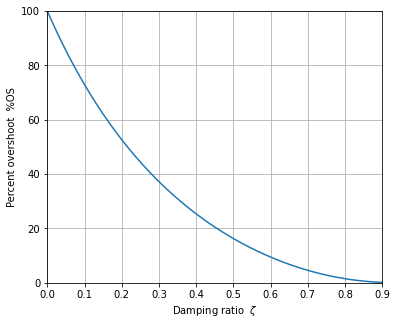

In [10]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(zeta_list, pOS_list)
plt.xlim(0, 0.9)
plt.ylim(0, 100)
plt.xlabel(r'Damping ratio  $\zeta$')
plt.ylabel(r'Percent overshoot  %OS')
plt.grid()
plt.show()

In [11]:
T_s = 4/(zeta*omega_n)
T_p = math.pi/(omega_n*math.sqrt(1-zeta*zeta))
pOS = math.exp(-zeta*math.pi/(math.sqrt(1-zeta*zeta)))*100

round(pOS, 1), round(T_s, 3), round(T_p, 3)

(23.3, 0.5, 0.182)